<a href="https://colab.research.google.com/github/lakatosgabor/ogyei_dataset_info/blob/main/ogyei_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Fájl elérési útja
file_path = '/content/drive/MyDrive/Colab Notebooks/ogyei/full_sentence_csv_prob.csv'
def remove_accents(input_string):
    normalized_string = unicodedata.normalize('NFD', input_string)
    stripped_string = ''.join(c for c in normalized_string if unicodedata.category(c) != 'Mn')
    return stripped_string

# CSV fájl beolvasása és tartalmának kiírása
with open(file_path, 'r', encoding='utf-8') as file:
    # CSV fájl olvasása, a "," karakterrel elválasztva
    csv_reader = csv.reader(file, delimiter='"')

    string_len = []
    counter = 0
    # Sorok beolvasása és kiíratása
    for row in csv_reader:
      counter += 1
      print(counter)
      filename = remove_accents(row[0].replace("\t", "")).replace(",", "").replace(" ", "_").replace("-", "_").replace("/", "_") + ".jpg"
      print(filename)

      desc = row[1].replace("\t", "").replace(":", "")
      print(desc)

      print("\n")

      string_len.append(len(desc))


Gyógyszer leírások hossza növekvő sorrendben: 
[ 53  54  56  60  61  64  67  68  69  71  71  73  73  74  75  75  75  77
  77  79  81  82  83  83  84  86  86  87  87  87  87  89  89  91  92  93
  94  95  97  97 106 106 109 111 111 112 112 114 116 116 117 117 118 119
 127 129 129 130 130 131 131 132 132 132 136 136 137 138 141 143 143 143
 144 149 150 153 153 154 155 160 161 161 165 169 169 172 172 177 181 181
 183 186 187 189 190 192 192 192 194 196 201 203 205 208 208 209 214 216
 220 236 279 286]
Minimum:  53
Maximum:  286
Átlag:  130.875
A szórás értéke: 50.77280012115599


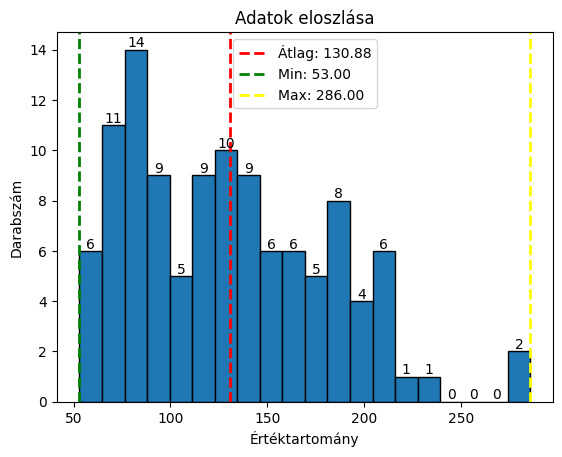

In [13]:
average_value = np.mean(string_len)
min_value = np.min(string_len)
max_value = np.max(string_len)

print("Gyógyszer leírások hossza növekvő sorrendben: ")
print(np.sort(string_len))
print("Minimum: ", min_value)
print("Maximum: ", max_value)
print("Átlag: ", average_value)

# Különbségek négyzetre emelése és átlagának számítása
squared_diff = sum((x - average_value) ** 2 for x in string_len) / len(string_len)

# Szórás kiszámítása (négyzetgyök)
standard_deviation = np.sqrt(squared_diff)

print("A szórás értéke:", standard_deviation)


n, bins, patches = plt.hist(string_len, bins=20, edgecolor='black')
plt.title('Adatok eloszlása')
plt.xlabel('Értéktartomány')
plt.ylabel('Darabszám')

# Értékek kiírása az oszlopokra
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 0.1, str(int(n[i])), ha='center')


# Egyenes rajzolása az átlaghoz
plt.axvline(x=average_value, color='red', linestyle='dashed', linewidth=2, label=f'Átlag: {average_value:.2f}')
plt.axvline(x=min_value, color='green', linestyle='dashed', linewidth=2, label=f'Min: {min_value:.2f}')
plt.axvline(x=max_value, color='yellow', linestyle='dashed', linewidth=2, label=f'Max: {max_value:.2f}')

plt.legend()

plt.show()

Illesztett egyenes egyenlete: y = -0.22x + 143.28
Az egyenes első pontja -> x = 0 y =  143.28318584101837
Az egyenes utolsó pontja -> x =  112  y =  118.24324324325467


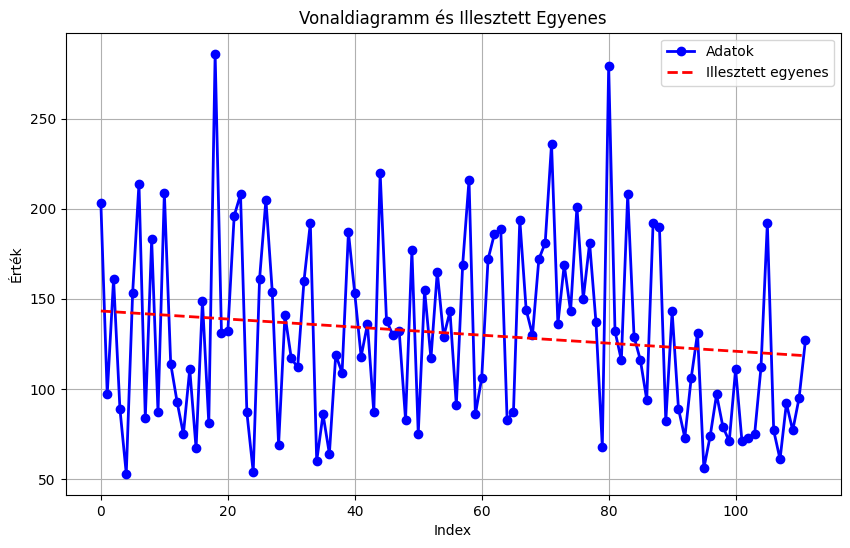

In [39]:
from scipy.optimize import curve_fit

# X és Y értékek definiálása
x_data = np.arange(len(string_len))  # Az x tengelyen az indexek
y_data = np.array(string_len)        # A y tengelyen a lista értékei

# Lineáris regresszió függvénye
def linear_func(x, a, b):
    return a * x + b

# Lineáris regresszió illesztése adatainkra
params, covariance = curve_fit(linear_func, x_data, y_data)

# Illesztett egyenes paraméterei
a, b = params

# Illesztett egyenes egyenlete
print(f"Illesztett egyenes egyenlete: y = {a:.2f}x + {b:.2f}")

first_point = a * 0 + b
last_point = a * len(string_len) + b
print("Az egyenes első pontja -> x = 0 y = ", first_point)
print("Az egyenes utolsó pontja -> x = ",len(string_len)," y = ", last_point)

# Vonaldiagramm készítése
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, color='b', marker='o', linestyle='-', linewidth=2, markersize=6, label='Adatok')
plt.plot(x_data, linear_func(x_data, a, b), color='r', linestyle='--', linewidth=2, label='Illesztett egyenes')

plt.title('Vonaldiagramm és Illesztett Egyenes')
plt.xlabel('Index')
plt.ylabel('Érték')
plt.legend()
plt.grid(True)
plt.show()


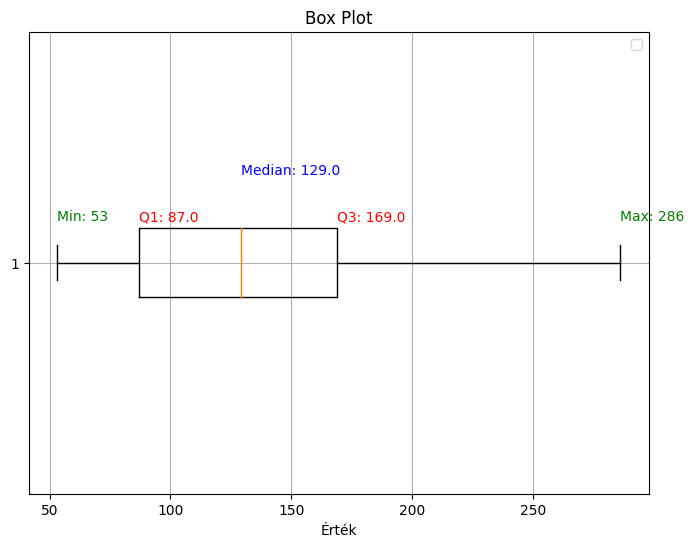

In [21]:
# Box plot készítése

q1 = np.percentile(string_len, 25)
q3 = np.percentile(string_len, 75)
median = np.median(string_len)


plt.figure(figsize=(8, 6))
plt.boxplot(string_len, vert=False, showfliers=False)  # Elrejtjük az outlier értékeket az ábrán
plt.title('Box Plot')
plt.xlabel('Érték')
plt.grid(True)

# Hozzáadjuk a kvartilis értékeket az ábrához
plt.text(q1, 1.1, f'Q1: {q1}', va='center', color='r')
plt.text(q3, 1.1, f'Q3: {q3}', va='center', color='r')
plt.text(median, 1.2, f'Median: {median}', va='center', color='b')
plt.text(min_value, 1.1, f'Min: {min_value}', va='center', color='g')
plt.text(max_value, 1.1, f'Max: {max_value}', va='center', color='g')

plt.legend()
plt.show()